In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import joblib
import string

In [2]:
fake = pd.read_csv('fake_news2.csv',sep=';') 
real = pd.read_csv('real_news2.csv',sep=';')

In [3]:
fake.head()

,judul_berita,waktu_berita_detail,label
0,Bantuan dari Pemerintah untuk TKI,06/05/2025,0
1,Dedi Mulyadi Sebut Orang yang Ragukan Ijazah J...,06/05/2025,0
2,Video Netanyahu Mengecam Presiden Prabowo,06/05/2025,0
3,Akun Facebook Tawarkan Bantuan Benih Ikan dari...,06/05/2025,0
4,PLN Bagikan Token Listrik Gratis Rp200.000,05/05/2025,0


In [4]:
real.head()

,judul_berita,waktu_berita_detail,label
0,Katy Perry dan Awak Perempuan Akhirnya Menembu...,14/04/2025,1
1,Tiga Bocah Jadi Korban Pencabulan Guru Hadroh ...,14/04/2025,1
2,"2 Rumah La Nyalla di Surabaya Digeledah KPK, B...",14/04/2025,1
3,Pengguna MyPertamina Meningkat Selama Masa Sat...,14/04/2025,1
4,Stres Bikin Asam Lambung Naik? Ini Penjelasan ...,14/04/2025,1


In [5]:
data = pd.concat([fake,real], axis =0 )
data.drop(["waktu_berita_detail"], axis = 1, inplace = True)

data.sample(10)

,judul_berita,label
11687,Sungai di Rejoso Binangun Tercemar Limbah Pabr...,0
8204,Jokowi Minta Semua Gubernur Tiru Kerja Keras A...,0
8642,Peta Yogyakarta di Timur Tengah,0
10673,Aneka Rayuan Utusan Prabowo Nego Tarif Trump d...,1
3578,Indonesia Dicopot sebagai Tuan Rumah Piala Dun...,0
13673,Gebrakan Dedi Mulyadi: Usul Vasektomi Jadi Sya...,1
3913,Cuti Bersama 23 Januari 2023 Bukan Libur Imlek...,0
10553,Arema FC Vs Persebaya: Kabar Baik dari 3 Pemai...,1
13396,Lalu Lintas Arah Monas Berpotensi Padat pada H...,1
13906,"Klarifikasi soal Sidak Wamenaker Ganggu, Pemil...",1


In [6]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

data.sample(10)

,judul_berita,label
7161,10 Orang di Jerman Meninggal karena Vaksin Cov...,0
14226,Jangan Masukkan 6 Makanan Ini ke Blender,1
4564,Video Detik-detik TNI Tembak Jatuh Jet Tempur ...,0
931,"Terawan Promosi Obat Diabetes, Disiarkan Kompa...",0
22947,"Jadwal Pemakaman Paus Fransiskus, Sabtu 26 Apr...",1
25532,Masa Depan Mobilitas dan Transportasi Cerdas I...,1
6736,Flyer Larangan Mudik Tahun 2021,0
5885,Tetesan Air Jeruk Nipis Dapat Mengurangi Minus...,0
11373,1950s photobomb,0
779,Video Bawaslu Arahkan Masyarakat Coblos Salah ...,0


In [7]:
x = data['judul_berita']
y = data['label']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
print("Jumlah data training:", len(x_train))
print("Jumlah data testing:", len(x_test))
print("Jumlah target training:", len(y_train))
print("Jumlah target testing:", len(y_test))

Jumlah data training: 19917
Jumlah data testing: 6639
Jumlah target training: 19917
Jumlah target testing: 6639


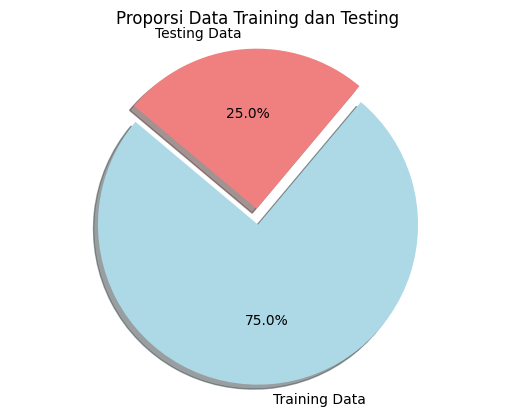

In [19]:

import matplotlib.pyplot as plt

# Data untuk pie chart
labels = ['Training Data', 'Testing Data']
sizes = [len(x_train), len(x_test)]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode 1st slice

# Membuat pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporsi Data Training dan Testing')
plt.show()

In [12]:
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train) # Fit dan transform data training
xv_test = vectorizer.transform(x_test)

In [13]:
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [14]:
pred_lr=lr.predict(xv_test)
lr.score(xv_test, y_test)

0.9272480795300497

In [15]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2971
           1       0.90      0.97      0.94      3668

    accuracy                           0.93      6639
   macro avg       0.93      0.92      0.93      6639
weighted avg       0.93      0.93      0.93      6639



In [ ]:
joblib.dump(lr, 'lr_model.jb')
joblib.dump(vectorizer, 'vectorizer.jb')

['vectorizer.jb']